#### Load library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

#### Format cells for review

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Exploration

In [4]:
ddcmap = pd.read_csv('data/district_dcmap.csv')

In [5]:
tn = gpd.read_file('Shape/tl_2010_47_county10.shp')
#tn.plot('myvalues', cmap='OrRd')

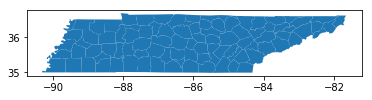

In [6]:
tn.plot()

In [7]:
ddcmap['county']=ddcmap['county'].str.capitalize()

In [8]:
ddcmap['classroom_teacher']=ddcmap['classroom_teacher'].str.replace(",","")
ddcmap['classroom_teacher']=pd.to_numeric(ddcmap['classroom_teacher'])

In [9]:
ddcmap['principal']=ddcmap['principal'].str.replace(" ", "")
ddcmap['principal']=ddcmap['principal'].str.replace(",","")
ddcmap['principal']=pd.to_numeric(ddcmap['principal'])

In [10]:
group_dc=ddcmap.groupby(['county', 'system_name'])['pct_chronically_absent'].mean()

In [11]:
group_co=pd.DataFrame(ddcmap.groupby(['county'])['pct_chronically_absent'].mean())

In [12]:
group_co.sort_values(by = 'pct_chronically_absent')

pct_chronically_absent
county                            
Crockett                  4.933333
Smith                     5.000000
Williamson                5.600000
Hamblen                   6.700000
Carroll                   6.833333
Blount                    7.100000
Robertson                 7.400000
Lawrence                  8.300000
Greene                    8.450000
Shelby                    8.500000
Montgomery                8.500000
Scott                     8.650000
Rutherford                8.700000
Johnson                   8.700000
Morgan                    8.800000
Hamilton                  8.900000
Clay                      9.000000
Benton                    9.000000
White                     9.000000
Mcnairy                   9.500000
Wilson                    9.500000
Sumner                    9.500000
Haywood                   9.700000
Tipton                    9.700000
Dyer                      9.750000
Lauderdale                9.800000
Gibson                    9.880000
Jackson                   9.900000
Putnam                   10.000000
Van buren                10.100000
Trousdale                10.200000
Henry                    10.600000
Giles                    10.600000
Dickson                  10.800000
Macon                    10.800000
Dekalb                   10.900000
Lewis                    11.000000
Overton                  11.000000
Perry                    11.000000
Anderson                 11.066667
Bradley                  11.100000
Rhea                     11.600000
Weakley                  11.900000
Grundy                   11.900000
Meigs                    12.000000
Henderson                12.100000
Obion                    12.250000
Cumberland               12.300000
Coffee                   12.366667
Maury                    12.600000
Bedford                  12.800000
Roane                    13.000000
Hickman                  13.100000
Loudon                   13.100000
Jefferson                13.200000
Mcminn                   13.200000
Hardeman                 13.400000
Fayette                  13.500000
Lincoln                  13.500000
Washington               13.600000
Moore                    13.600000
Fentress                 13.650000
Cheatham                 14.100000
Warren                   14.200000
Monroe                   14.250000
Hawkins                  14.350000
Humphreys                14.400000
Franklin                 14.400000
Sullivan                 14.466667
Cannon                   14.500000
Polk                     14.700000
Knox                     14.900000
Stewart                  15.100000
Cocke                    15.100000
Marshall                 15.300000
Pickett                  15.600000
Hardin                   15.800000
Chester                  16.000000
Hancock                  16.500000
Bledsoe                  16.600000
Davidson                 16.900000
Wayne                    17.300000
Union                    17.400000
Carter                   19.050000
Sequatchie               19.200000
Decatur                  19.600000
Lake                     19.900000
Sevier                   20.600000
Unicoi                   20.800000
Madison                  21.500000
Campbell                 21.600000
Claiborne                22.900000
Marion                   24.500000
Grainger                 36.200000
Houston                  39.400000

In [13]:
(ddcmap.groupby('county')['classroom_teacher','principal'].median()).reset_index()

county  classroom_teacher  principal
0     Anderson            46386.0    81234.0
1      Bedford            45733.0    78245.0
2       Benton            45908.0    64938.0
3      Bledsoe            48781.0    69205.0
4       Blount            61790.0    99120.0
5      Bradley            51357.0    86421.5
6     Campbell            45726.0    72243.0
7       Cannon            44245.0    68512.0
8      Carroll            45071.0    67514.5
9       Carter            46066.5    70638.5
10    Cheatham            45380.0    78234.0
11     Chester            45955.0    76149.0
12   Claiborne            43714.0    72503.0
13        Clay            43905.0    62520.0
14       Cocke            46372.5    75449.5
15      Coffee            50964.0    75321.0
16    Crockett            45012.0    66842.0
17  Cumberland            42485.0    73569.0
18    Davidson            51855.0   103445.0
19     Decatur            45987.0    73763.0
20      Dekalb            43183.0    67396.0
21     Dickson            44708.0    73545.0
22        Dyer            50130.5    82861.5
23     Fayette            41855.0    61612.0
24    Fentress            42922.0    63072.0
25    Franklin            46957.0    72442.0
26      Gibson            44757.0    76023.0
27       Giles            46535.0    75975.0
28    Grainger            45831.0    68502.0
29      Greene            49081.5    81274.5
30      Grundy            42582.0    63014.0
31     Hamblen            49134.0    83650.0
32    Hamilton            50469.0    90784.0
33     Hancock            41992.0    66948.0
34    Hardeman            46467.0    72536.0
35      Hardin            44760.0    63897.0
36     Hawkins            46499.5    72565.0
37     Haywood            44304.0    68504.0
38   Henderson            46787.0    70447.0
39       Henry            49238.0    81162.0
40     Hickman            44293.0    77659.0
41     Houston            47025.0    67201.0
42   Humphreys            46159.0    69350.0
43     Jackson            44936.0    68643.0
44   Jefferson            45711.0    75567.0
45     Johnson            44491.0    67080.0
46        Knox            49384.0    95880.0
47        Lake            42329.0    69334.0
48  Lauderdale            44842.0    78089.0
49    Lawrence            47480.0    73242.0
50       Lewis            47369.0    77934.5
51     Lincoln            48529.0    85181.0
52      Loudon            50248.0    86751.5
53       Macon            45804.0    74033.0
54     Madison            48908.0    84961.0
55      Marion            43847.5    65142.0
56    Marshall            48272.0    77559.0
57       Maury            47787.0    88736.0
58      Mcminn            49123.0    83138.0
59     Mcnairy            44326.0    72410.0
60       Meigs            49633.0    72803.0
61      Monroe            47785.0    70007.0
62  Montgomery            52503.0    95957.0
63       Moore            46992.0    73340.0
64      Morgan            44223.0    72545.0
65       Obion            47327.0    79783.0
66     Overton            42734.0    63263.0
67       Perry            45979.0    67719.0
68     Pickett            46202.0    65663.0
69        Polk            48429.0    77124.0
70      Putnam            47186.0    74008.0
71        Rhea            46051.0    69004.0
72       Roane            50470.0    78674.0
73   Robertson            44548.0    74412.0
74  Rutherford            51697.0    90088.5
75       Scott            44043.5    69429.0
76  Sequatchie            46463.0    73347.0
77      Sevier            50356.0    91611.0
78      Shelby            57769.0   106055.0
79       Smith            42951.0    64385.0
80     Stewart            47148.0    70787.0
81    Sullivan            52591.0    94810.0
82      Sumner            46988.0    85660.0
83      Tipton            51528.0    81081.0
84   Trousdale            44706.0    72809.0
85      Unicoi            44148.0    65544.0
86       Union            43970.0    69540.0
87   Van buren            46806.0    63002.0
88 

In [14]:
tn.NAME10 = tn.NAME10.str.capitalize() # fixes mismatches before merge

In [15]:
pct_man=ddcmap.groupby('county')['n_students','n_chronically_absent'].sum()

In [16]:
pct_man['pct'] = pct_man.n_chronically_absent/pct_man.n_students

In [17]:
pct_man.sort_values(by = 'pct', ascending = False)

n_students  n_chronically_absent       pct
county                                                
Houston           1329                   523  0.393529
Grainger          3376                  1223  0.362263
Claiborne         4219                   967  0.229201
Carter            7681                  1686  0.219503
Campbell          5456                  1178  0.215909
Madison          12480                  2688  0.215385
Unicoi            2279                   474  0.207986
Sevier           14373                  2956  0.205663
Lake               772                   154  0.199482
Decatur           1569                   307  0.195666
Marion            4245                   828  0.195053
Sequatchie        2204                   424  0.192377
Union             3517                   611  0.173728
Wayne             2141                   370  0.172816
Davidson         82312                 13931  0.169246
Cocke             5127                   866  0.168910
Bledsoe           1681                   279  0.165973
Hancock            972                   160  0.164609
Chester           2846                   454  0.159522
Hardin            3433                   541  0.157588
Pickett            693                   108  0.155844
Marshall          5341                   818  0.153155
Stewart           1983                   300  0.151286
Sullivan         20940                  3163  0.151051
Knox             58691                  8767  0.149376
Monroe            6787                  1011  0.148961
Polk              2299                   338  0.147020
Shelby          137300                 20038  0.145943
Cannon            1894                   275  0.145195
Humphreys         2842                   410  0.144265
Franklin          5309                   764  0.143907
Warren            6469                   920  0.142217
Cheatham          6232                   881  0.141367
Rhea              5089                   712  0.139910
Hawkins           7328                  1015  0.138510
Mcminn            7416                  1025  0.138215
Washington       16232                  2230  0.137383
Moore              839                   114  0.135876
Fayette           3282                   444  0.135283
Lincoln           3767                   507  0.134590
Hardeman          3522                   473  0.134299
Obion             4909                   657  0.133836
Jefferson         7105                   938  0.132020
Hickman           3272                   430  0.131418
Fentress          2652                   347  0.130845
Henderson         4689                   610  0.130092
Roane             6517                   846  0.129814
Bedford           8502                  1088  0.127970
Coffee            9013                  1138  0.126262
Maury            12228                  1535  0.125532
Anderson         11621                  1432  0.123225
Cumberland        7172                   883  0.123118
Meigs             1663                   199  0.119663
Weakley           4136                   493  0.119197
Loudon            6869                   818  0.119086
Grundy            2046                   243  0.118768
Bradley          15269                  1704  0.111599
Wilson           21242                  2355  0.110865
Overton           3014                   333  0.110484
Perry             1039                   114  0.109721
Lewis             3024                   331  0.109458
Dekalb            2870                   313  0.109059
Macon             3828                   415  0.108412
Dickson           8256                   894  0.108285
Giles             3799                   401  0.105554
Henry             4565                   478  0.104710
Trousdale         1259                   129  0.102462
Van buren          701                    71  0.101284
Rutherford       51769                  5237  0.101161
Putnam           10948                  1098  0.100292
Jackson           1444                   143  0.0990

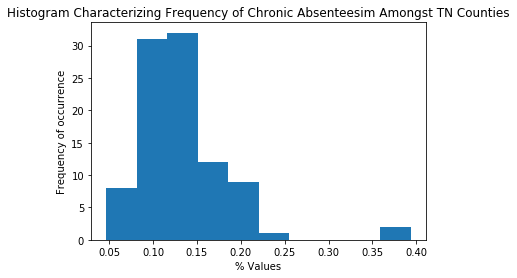

In [18]:
freq = pct_man.pct
plt.hist(freq)
plt.ylabel('Frequency of occurrence')
plt.xlabel('% Values')
plt.title('Histogram Characterizing Frequency of Chronic Absenteesim Amongst TN Counties')
plt.show()

Text(0.5,1,'Distribution of Chronically Absent Students Amongst TN Counties')

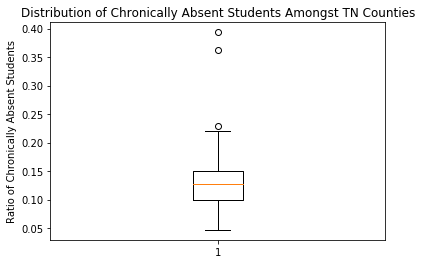

In [19]:
plt.boxplot(freq)
plt.ylabel('Ratio of Chronically Absent Students')
plt.title('Distribution of Chronically Absent Students Amongst TN Counties')

#### Merge data together

In [20]:
tn_abs1=pd.merge(group_co,tn,how = 'outer', left_on='county', right_on='NAME10')

In [21]:
tn_abs2=pd.merge(tn_abs1,pct_man, left_on = 'NAME10', right_on='county' )

In [22]:
(tn_abs2['pct']*100).round() == tn_abs2['pct_chronically_absent'].round() # Decided to use calculated pct instead of averaged. 
#Calculated may be more accurate

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14    False
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24    False
25     True
26    False
27     True
28     True
29    False
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38    False
39    False
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51    False
52    False
53     True
54     True
55    False
56     True
57     True
58    False
59    False
60     True
61    False
62    False
63     True
64     True
65    False
66     True
67     True
68     True
69     True
70     True
71    False
72     True
73     True
74    False
75    False
76     True
77     True
78    False
79     True
80     True
81    False
82    False
83  

In [23]:
pct_man_idx = pct_man.reset_index()

In [24]:
merged = tn.set_index('NAME10').join(pct_man_idx.set_index('county'))

In [25]:
merged['percentage_abs'] = round((merged.pct)*100,2)

#### Creating a chloropleth of TN

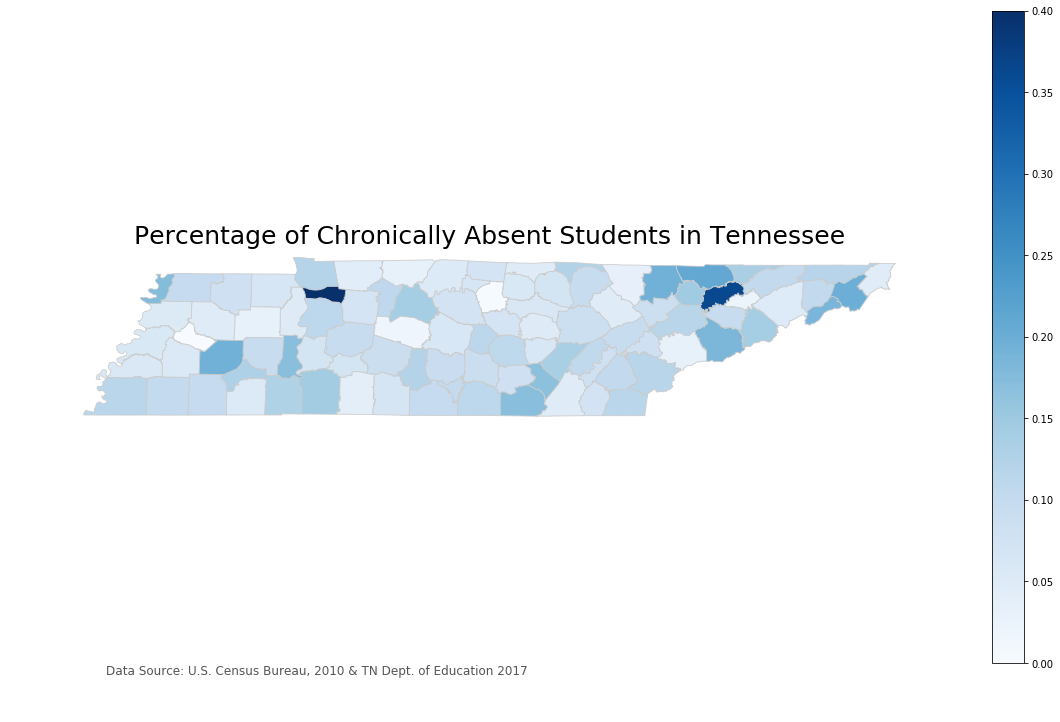

In [26]:
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='pct', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Percentage of Chronically Absent Students in Tennessee', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source

ax.annotate('Data Source: U.S. Census Bureau, 2010 & TN Dept. of Education 2017',xy=(0.1, .08),  xycoords= 'figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color= '#555555')

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=0.4))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)

In [27]:
import json

#Read data to json.
merged_json = json.loads(merged.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [28]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest percentage.???
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
#p = figure(title = 'Percentage of Students Chronically Absent, 2016-2017', plot_height = 400 , plot_width = 950, toolbar_location = None)
#p.xgrid.grid_line_color = None
#p.ygrid.grid_line_color = None

#Add hover tool
hover = HoverTool(tooltips = [ ('County','@NAMELSAD10'),('% chronically absent','@pct')])

#Create figure object.
p = figure(title = 'Percentage of Chronically Absent Students, 2016-2017', plot_height = 400 , plot_width = 800, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'pct', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

In [29]:
## Question... Does teacher salary reflect quality of teacher?  If so, could that indirectly impact student absenteeism
salary_tp=ddcmap.groupby('county')['classroom_teacher','principal'].median() #Median... attempted to avoid extreme outliers if present

In [30]:
tn_as=pd.merge(tn_abs2,salary_tp, left_on = 'NAME10', right_on='county') #tn_absence,salary... salary is based on median to avoid outliers

In [31]:
tn_as1=tn_as.iloc[:,[5, 19,20,21,22,23]] #removed unneeded variables

#### Incorporate additional external factors

In [32]:
health17tn = pd.read_csv('data/Outcomes and Factor Rankings Data 1719.csv')

In [33]:
health17tn.columns = ('FIPS', 'State', 'County', 'Health Outcomes Z-score', 'Health Outcomes Rank', 'Health Factors Z-score', 'Health Factors Rank', '')

In [34]:
health17subranks = pd.read_csv('data/Outcomes and Factor Subrankings Data 1719.csv')

In [35]:
health17subranks.columns = ('FIPS', 'State', 'County', 'Length of Life Z-score', 'Length of Life Rank', ' Quality of Life Z-score', 'Quality of Life Rank', 'Health Behaviors Z-Score', 'Health Behaviors Rank', ' Clinical Care Z-score', 'Clinical Care Rank', 'Social & Economic Factors Z-score', 'Social & Economic Factors Rank', 'Physical Environment Z-score', 'Physical Environment Rank', '')

In [36]:
disparaties17 = pd.read_csv('data/Ranked Measure Data 1719.csv')
more_disparaties17 = pd.read_csv('data/Additional Data Measures 1719.csv')

In [37]:
disparaties17['Unnamed: 2'] = disparaties17['Unnamed: 2'].str.capitalize() # Match all columns

In [38]:
more_disparaties17['Unnamed: 2'] = more_disparaties17['Unnamed: 2'].str.capitalize()
health17tn['County'] = health17tn['County'].str.capitalize()
health17subranks['County'] = health17subranks['County'].str.capitalize()

In [39]:
abs_health=pd.merge(tn_as1,health17tn, left_on = 'NAME10', right_on='County')

In [40]:
abs_health=abs_health.iloc[:,[0,1,2,3,4,5,9,10,11,12,13]]  #selected needed columns

In [41]:
abs_health['Health Factors Rank']=pd.to_numeric(abs_health.iloc[:,-2])
abs_health['Health Factors Z-score']=pd.to_numeric(abs_health.iloc[:,-3])
abs_health['Health Outcomes Z-score']=pd.to_numeric(abs_health.iloc[:,6])
abs_health['Health Outcomes Rank']=pd.to_numeric(abs_health.iloc[:,7])

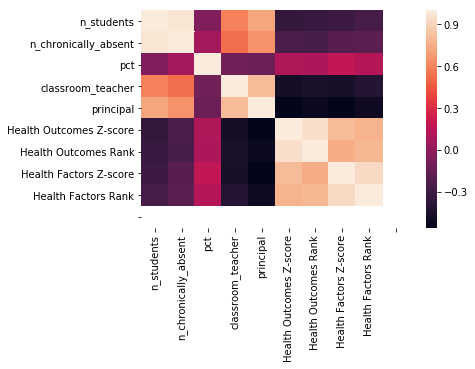

In [42]:
corr = abs_health.corr()

# plot the heatmap
sns.heatmap(corr)

In [43]:
abs_health2=pd.merge(tn_as1,health17subranks, left_on = 'NAME10', right_on='County')

In [44]:
abs_health2 = abs_health2.iloc[:,[0,1,2,3,4,5,9,10,11,12,13,14,15,16,17,18,19,20]] #selected needed columns

In [45]:
abs_health2a=abs_health2.iloc[:,1:].astype(float)
abs_health2a['County']=abs_health['NAME10']
abs_health2a.head()

n_students  n_chronically_absent       pct  classroom_teacher  principal  Length of Life Z-score  Length of Life Rank   Quality of Life Z-score  Quality of Life Rank  Health Behaviors Z-Score  Health Behaviors Rank   Clinical Care Z-score  Clinical Care Rank  Social & Economic Factors Z-score  Social & Economic Factors Rank  Physical Environment Z-score  Physical Environment Rank    County
0     11621.0                1432.0  0.123225            46386.0    81234.0                   -0.20                 30.0                     -0.15                  30.0                     -0.11                   19.0                   -0.22                 7.0                              -0.10                            31.0                          0.01                       57.0  Anderson
1      8502.0                1088.0  0.127970            45733.0    78245.0                   -0.14                 34.0                     -0.01                  46.0                      0.03                   56.0                    0.06                67.0                              -0.03                            42.0                          0.06                       86.0   Bedford
2      2123.0                 192.0  0.090438            45908.0    64938.0                    0.70                 86.0                      0.15                  65.0                      0.10                   74.0                    0.11                81.0                               0.23                            81.0                          0.01                       59.0    Benton
3      1681.0                 279.0  0.165973            48781.0    69205.0                   -0.69                  7.0                     -0.15                  32.0                      0.33                   93.0                    0.19                90.0                               0.41                            93.0                         -0.05                       11.0   Bledsoe
4     17779.0                1338.0  0.075257            61790.0    99120.0                   -0.55                 14.0                     -0.50                   9.0                     -0.16                   10.0                   -0.18                 9.0                              -0.32                             7.0                          0.04                       80.0    Blount

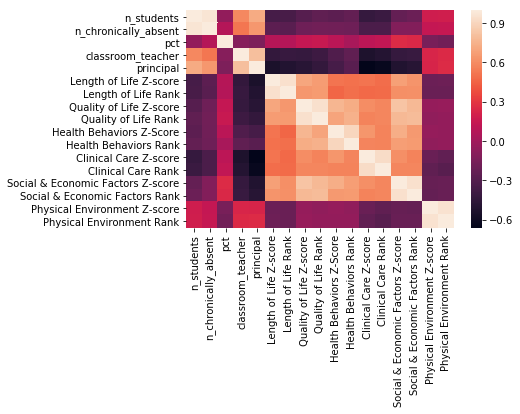

In [46]:
corr = abs_health2a.corr()

# plot the heatmap
sns.heatmap(corr)

In [47]:
abs_health3=pd.merge(tn_as,disparaties17, left_on = 'NAME10', right_on='Unnamed: 2')

In [48]:
abs_health_3=abs_health3.iloc[:,[5,21,22,23,38,42,47,54,58,62,64,83,91,95,99,103,117,133,135,148,155,167]]

In [49]:
abs_health_3.columns = ('NAME10', 'pct', 'classroom_teacher', 'principal', 'Poor physical health days', 'Poor mental health days', '% Low Birth Weight', 'Adult smoking', 'Adult obesity', 'Food environment index', 'Physical inactivity', 'Teen births', '% Uninsured', 'Primary care physicians', 'Dentists', 'Mental health providers', 'Flu vaccinations', '% Unemployed', 'Children in poverty', '% Single-Parent Household', 'Violent crime', 'Severe housing problems')

In [50]:
abs_health_3a = abs_health_3.iloc[:,1:].astype(float)
abs_health_3a['County'] = abs_health3['NAME10']

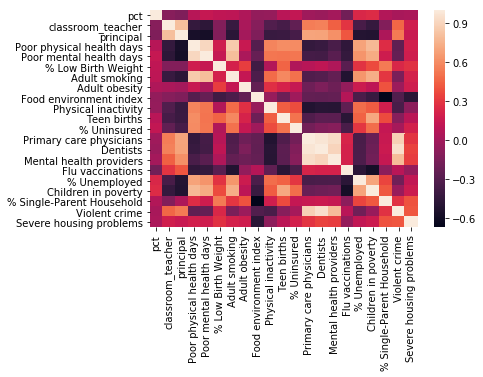

In [51]:
corr = abs_health_3a.corr()

# plot the heatmap
sns.heatmap(corr)

In [52]:
demographics = more_disparaties17.iloc[:,89:] #Will need to explore in greater detail later

In [53]:
demographics['County'] = more_disparaties17['Unnamed: 2']

C:\Users\unews\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
demographics.columns=demographics.iloc[0,:]

In [55]:
demographics = demographics.iloc[1,:]

In [56]:
abs_health4=pd.merge(tn_as,more_disparaties17, left_on = 'NAME10', right_on='Unnamed: 2')

In [57]:
more=more_disparaties17.iloc[:,[2,3,9,16,17,23,24,30,33,36,39,40,41,42,43,44,45,46,51,54,55,58,59,65,71,74,77,81,82,85,86]]

In [58]:
more.columns = ('County', 'Life expectancy', 'Premature age-adjusted mortality', 'Child mortality # Deaths', 'Child Mortality Rate', 'Infant mortality # of Deaths', 'Infant Mortality Rate', '% Frequent physical distress', '%Frequent mental distress', '% Diabetes prevalence', 'HIV prevalence # of cases', 'HIV Prevalence Rate', '# of Food insecure', '% of Food Insecure', '# with Limited access to healthy foods', '% of limited access to healthy foods', '# of Drug overdose deaths', 'Drug Overdose Mortality Rate', '% Insufficient sleep', '# of Uninsured adults', '% of Uninsured Adults', '# of Uninsured children', '% of Uninsured children', 'Median household income', '%Children eligible for free or reduced price lunch', 'Homicides', '# of Firearm fatalities', '# of Homeowners', '% of Homeowners', '# of Households with Severe housing cost burden', '% of Severe Housing Cost Burden')

In [59]:
more_disp=pd.merge(tn_as1,more, left_on = 'NAME10', right_on = 'County')

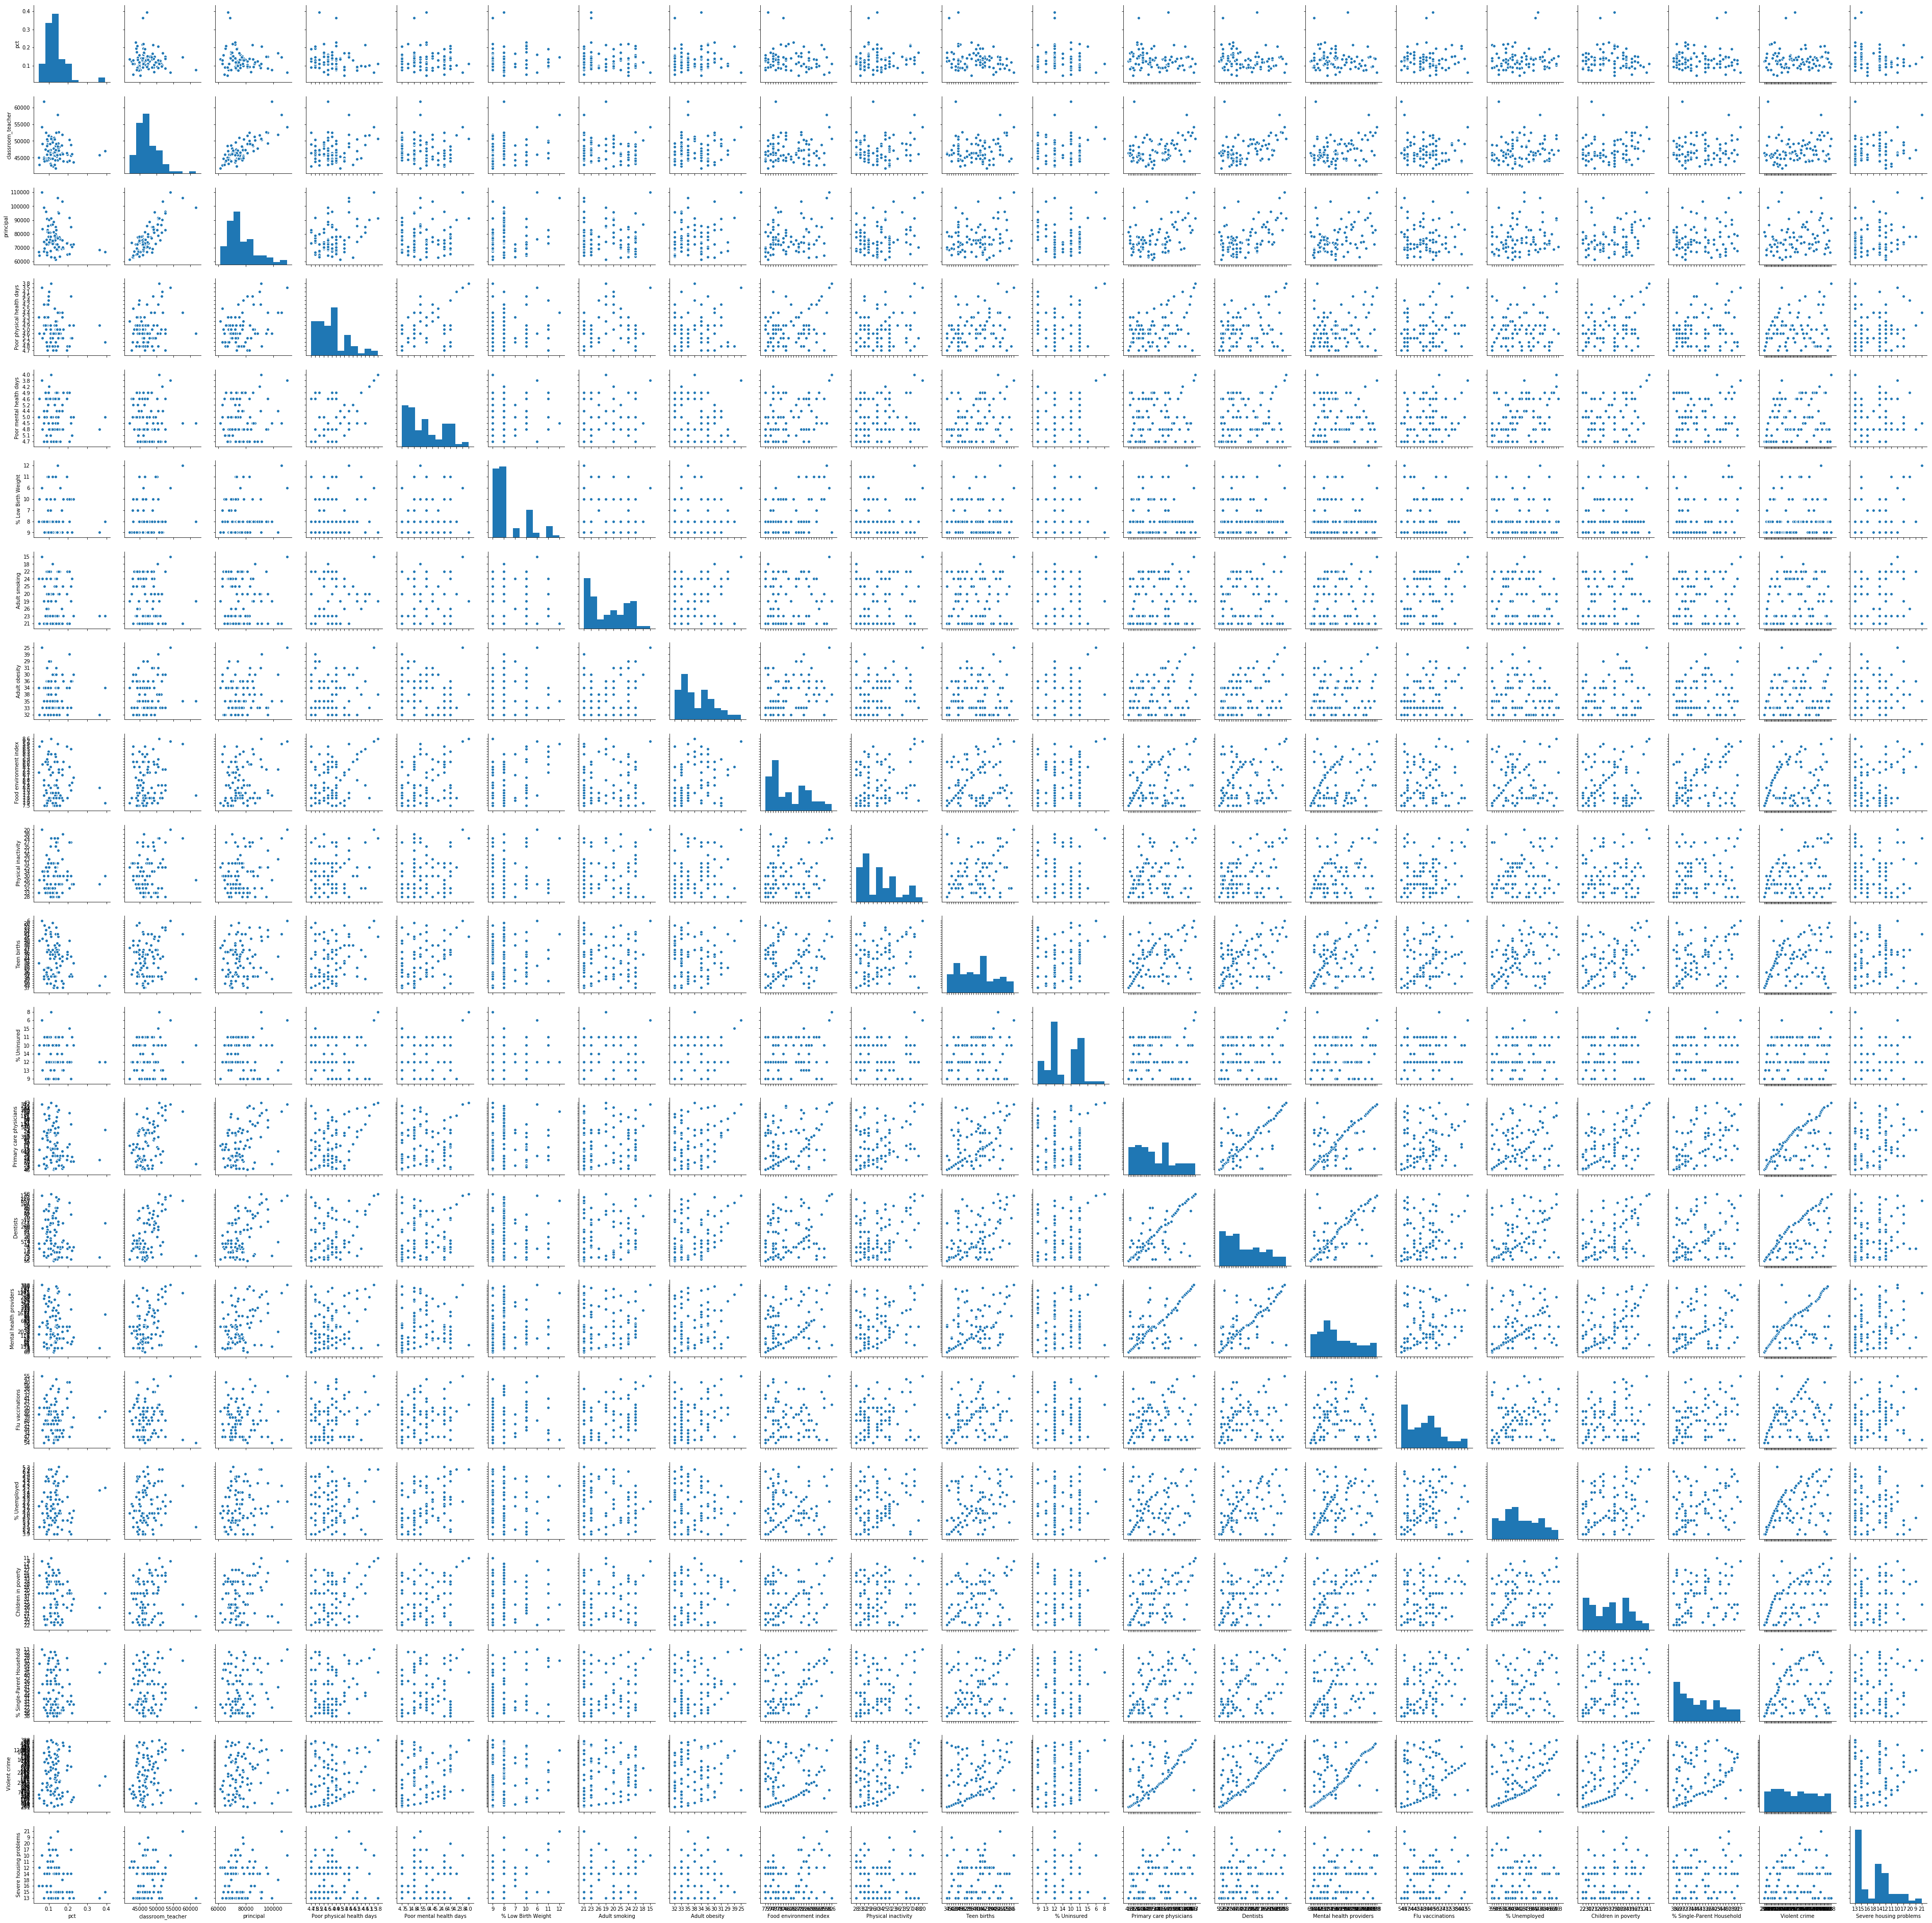

In [60]:
sns.pairplot((abs_health_3.dropna()))

In [61]:
more_disp = more_disp.drop('County',axis=1)

In [62]:
more_dispa = more_disp.iloc[:,1:].astype(float)
more_dispa['County'] = more_disp['NAME10']


In [63]:
more_dispa = more_dispa.drop('%Children eligible for free or reduced price lunch', axis = 1)

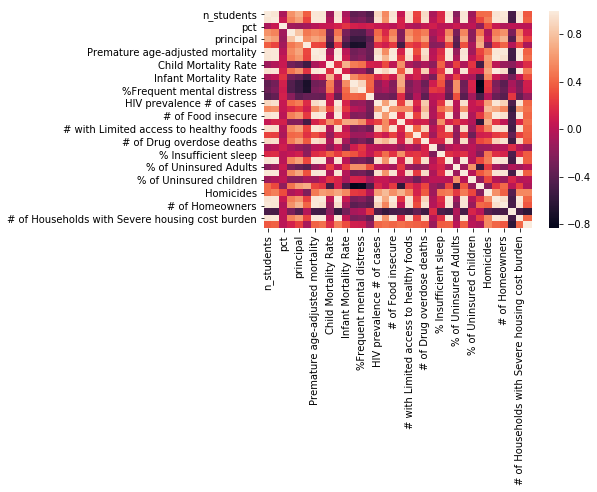

In [64]:
corr = more_dispa.corr()

# plot the heatmap
sns.heatmap(corr)

### Model

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

C:\Users\unews\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
p1 = more_dispa.iloc[:,3:35]

In [67]:
p2 = abs_health_3a.iloc[:, 4:]#change to 4?

In [68]:
prep = pd.merge(p1,p2, on = 'County')

In [69]:
X = prep.drop(['County','Child mortality # Deaths','Infant mortality # of Deaths', 'HIV prevalence # of cases',
              '# of Food insecure', '# with Limited access to healthy foods', '# of Drug overdose deaths', '# of Uninsured adults',
              '# of Uninsured children','# of Homeowners'],axis = 1)

In [70]:
y = abs_health_3a.iloc[:,0]

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 39 columns):
classroom_teacher                                  95 non-null float64
principal                                          95 non-null float64
Life expectancy                                    95 non-null float64
Premature age-adjusted mortality                   95 non-null float64
Child Mortality Rate                               68 non-null float64
Infant Mortality Rate                              47 non-null float64
% Frequent physical distress                       95 non-null float64
%Frequent mental distress                          95 non-null float64
% Diabetes prevalence                              95 non-null float64
HIV Prevalence Rate                                89 non-null float64
% of Food Insecure                                 95 non-null float64
% of limited access to healthy foods               94 non-null float64
Drug Overdose Mortality Rate                 

In [72]:
X=X.fillna(X.mean())  #empty columns with mean of the column

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 39 columns):
classroom_teacher                                  95 non-null float64
principal                                          95 non-null float64
Life expectancy                                    95 non-null float64
Premature age-adjusted mortality                   95 non-null float64
Child Mortality Rate                               95 non-null float64
Infant Mortality Rate                              95 non-null float64
% Frequent physical distress                       95 non-null float64
%Frequent mental distress                          95 non-null float64
% Diabetes prevalence                              95 non-null float64
HIV Prevalence Rate                                95 non-null float64
% of Food Insecure                                 95 non-null float64
% of limited access to healthy foods               95 non-null float64
Drug Overdose Mortality Rate                 

In [74]:
Xtrain, Xtest,ytrain, ytest = train_test_split(X,y,test_size = 0.25, random_state=42)

In [75]:
linear_model = LinearRegression()
linear_model.fit(Xtrain, ytrain)
linear_predict = linear_model.predict(Xtest)

In [76]:
linear_model.coef_[0]

3.1653027140779854e-06

In [77]:
linear_model.intercept_

0.49259947327922404

In [78]:
y_try=np.array(ytest)

In [79]:
linear_predict

array([0.05557307, 0.1400953 , 0.26735824, 0.0870577 , 0.14055174,
       0.0874297 , 0.19776377, 0.14540419, 0.19035141, 0.07514155,
       0.17717267, 0.1041143 , 0.16401623, 0.25685703, 0.18999163,
       0.18839201, 0.39333016, 0.11712271, 0.14705928, 0.17054765,
       0.09432513, 1.17873453, 0.12225662, 0.06475527])

In [80]:
df=pd.DataFrame(y_try,linear_predict).reset_index()
df.columns=('Linear_predict','y_actual')


Text(0.5,1,'Comparison of Predictive Models for Chronic Absenteeism in TN Counties')

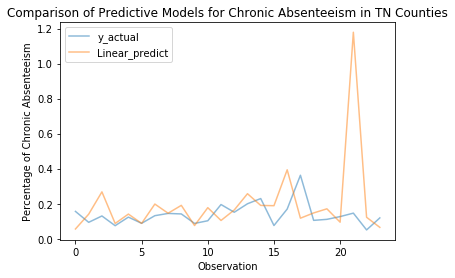

In [81]:
df[['y_actual','Linear_predict']].plot(alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Percentage of Chronic Absenteeism')
plt.title('Comparison of Predictive Models for Chronic Absenteeism in TN Counties')

In [82]:
params = pd.Series(linear_model.coef_,index=X.columns)

In [83]:
np.random.seed(1)
err = np.std([linear_model.fit(*resample(X,y)).coef_
             for i in range(1000)],0)

print(pd.DataFrame({'effect':params,
                     'error': err}))


                                                       effect     error
classroom_teacher                                3.165303e-06  0.000006
principal                                        1.097783e-06  0.000002
Life expectancy                                  1.587947e-03  0.011374
Premature age-adjusted mortality                -4.089742e-05  0.000088
Child Mortality Rate                            -8.587819e-04  0.001218
Infant Mortality Rate                            1.582024e-02  0.011118
% Frequent physical distress                    -2.587153e-02  0.025625
%Frequent mental distress                       -2.770411e-02  0.024326
% Diabetes prevalence                           -4.987517e-03  0.009763
HIV Prevalence Rate                              1.735406e-05  0.000178
% of Food Insecure                              -1.979509e-02  0.030013
% of limited access to healthy foods            -9.873472e-03  0.018790
Drug Overdose Mortality Rate                     1.429169e-03  0

In [84]:
param_error = pd.DataFrame({'effect':params,
                     'error': err})


In [85]:
param_error.sort_values(by='effect', ascending = False)

effect     error
Poor mental health days                          1.533780e-01  0.130880
% Unemployed                                     1.795528e-02  0.022178
Infant Mortality Rate                            1.582024e-02  0.011118
Adult obesity                                    8.538415e-03  0.005825
Adult smoking                                    6.354654e-03  0.008389
% of Uninsured children                          6.003258e-03  0.028345
Children in poverty                              5.978580e-03  0.004665
% of Uninsured Adults                            3.867257e-03  0.022186
Flu vaccinations                                 2.776199e-03  0.002465
% of Severe Housing Cost Burden                  2.366836e-03  0.010130
% Low Birth Weight                               2.012967e-03  0.012526
Life expectancy                                  1.587947e-03  0.011374
Drug Overdose Mortality Rate                     1.429169e-03  0.001275
% of Homeowners                                  7.483313e-04  0.003311
# of Firearm fatalities                          7.078335e-04  0.001076
Primary care physicians                          7.059433e-04  0.000658
Violent crime                                    1.400402e-04  0.000123
% Uninsured                                      1.351271e-04  0.029050
HIV Prevalence Rate                              1.735406e-05  0.000178
classroom_teacher                                3.165303e-06  0.000006
principal                                        1.097783e-06  0.000002
Median household income                          2.813301e-07  0.000003
# of Households with Severe housing cost burden -3.432733e-06  0.000038
Premature age-adjusted mortality                -4.089742e-05  0.000088
Mental health providers                         -1.195661e-04  0.000267
Severe housing problems                         -3.034072e-04  0.008896
Teen births                                     -7.969505e-04  0.001959
Child Mortality Rate                            -8.587819e-04  0.001218
% Single-Parent Household                       -1.179948e-03  0.002816
Dentists                                        -1.890640e-03  0.001358
% Insufficient sleep                            -2.945012e-03  0.008342
% Diabetes prevalence                           -4.987517e-03  0.009763
Homicides                                       -5.845238e-03  0.008310
Physical inactivity                             -8.819751e-03  0.004175
% of limited access to healthy foods            -9.873472e-03  0.018790
% of Food Insecure                              -1.979509e-02  0.030013
% Frequent physical distress                    -2.587153e-02  0.025625
%Frequent mental distress                       -2.770411e-02  0.024326
Food environment index                          -1.091789e-01  0.193318

In [86]:
forest = RandomForestRegressor()
forest.fit(Xtrain,ytrain)

RF_model = forest.predict(Xtest)

In [87]:
df['RF_model predict'] = RF_model

Text(0.5,1,'Comparison of Predictive Models for Chronic Absenteeism in TN Counties')

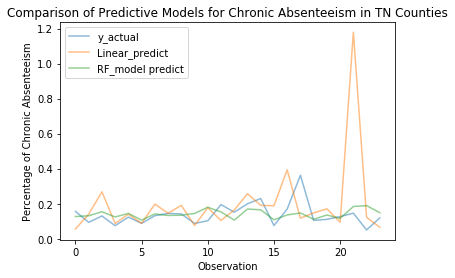

In [90]:
df[['y_actual','Linear_predict','RF_model predict']].plot(alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Percentage of Chronic Absenteeism')
plt.title('Comparison of Predictive Models for Chronic Absenteeism in TN Counties')

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

MSE_linear = mean_squared_error(ytest,linear_predict)
MSE_rf = mean_squared_error(ytest, RF_model)

rms_linear = sqrt(mean_squared_error(ytest, linear_predict)) #May not be ideal because of outlier
rms_rf = sqrt(mean_squared_error(ytest,RF_model))

MAE_linear = mean_absolute_error(ytest,linear_predict)
MAE_rf = mean_absolute_error(ytest,RF_model)

print('The mean square error (MSE) for the linear model was', MSE_linear)
print('The mean square error (MSE) for the random forest model was', MSE_rf)
print('The root mean square error (RMSE) for the linear model was', rms_linear)
print('The root mean square error (RMSE) for the random forest model was', rms_rf)
print('The mean absolute error (MAE) for the linear model was', MAE_linear)
print('The mean absolute error (MAE) for the random forest model was', MAE_rf)


The mean square error (MSE) for the linear model was 0.05257126453175157
The mean square error (MSE) for the random forest model was 0.003976144807498504
The root mean square error (RMSE) for the linear model was 0.22928424396750766
The root mean square error (RMSE) for the random forest model was 0.06305667932502079
The mean absolute error (MAE) for the linear model was 0.10809558032832599
The mean absolute error (MAE) for the random forest model was 0.043921124178567715
